In [1]:
from subprocess import Popen
import os
import json
import sys
from signal import SIGINT, SIGTERM
from tempfile import NamedTemporaryFile
import matplotlib.pyplot as plt
import visualize

%config InlineBackend.figure_format = "retina"

In [3]:
(stdin, send_stdin) = os.pipe()  # for parent -> child writes
(recv_stdout, stdout) = os.pipe()  # for child -> parent writes
outfile = os.fdopen(send_stdin, 'w', buffering=1) # Buffer line by line
infile = os.fdopen(recv_stdout)

def communicate(obj):
    outfile.write(json.dumps(obj))
    outfile.write('\n')
    outfile.flush()
    if child.poll():
        return child.wait()
    return json.loads(infile.readline())

def raytrace(inp):
    inp = inp.copy()
    with NamedTemporaryFile(suffix='.bin', mode='w+b') as f:
        inp['bin_file'] = f.name
        img_md = communicate(inp)
        img = f.read()
    return (img, img_md)

In [4]:
child = Popen(['/Users/seth/Code/celeritas/build-ndebug/bin/celer-geo', '-'],
              stdin=stdin, stdout=stdout,
              env={"CELER_COLOR": "1"})

info: Reading JSON line input from <stdin>


In [5]:
communicate({
    "geometry_file": "/Users/seth/Documents/work/celeritas-benchmarks/celer-g4/atlas-tilecal/input/TileTB_2B1EB.gdml"
})

info: Loading Geant4 geometry from GDML at /Users/seth/Documents/work/celeritas-benchmarks/celer-g4/atlas-tilecal/input/TileTB_2B1EB.gdml
G4Material: warning: duplicate name of material Scintillator
G4Material: warning: duplicate name of material Air
G4Material: warning: duplicate name of material Air
G4Material: warning: duplicate name of material Scintillator


{'cuda_heap_size': None,
 'cuda_stack_size': None,
 'geometry_file': '/Users/seth/Documents/work/celeritas-benchmarks/celer-g4/atlas-tilecal/input/TileTB_2B1EB.gdml'}

status: Tracing vecgeom image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmp0vdbiq6k.bin'


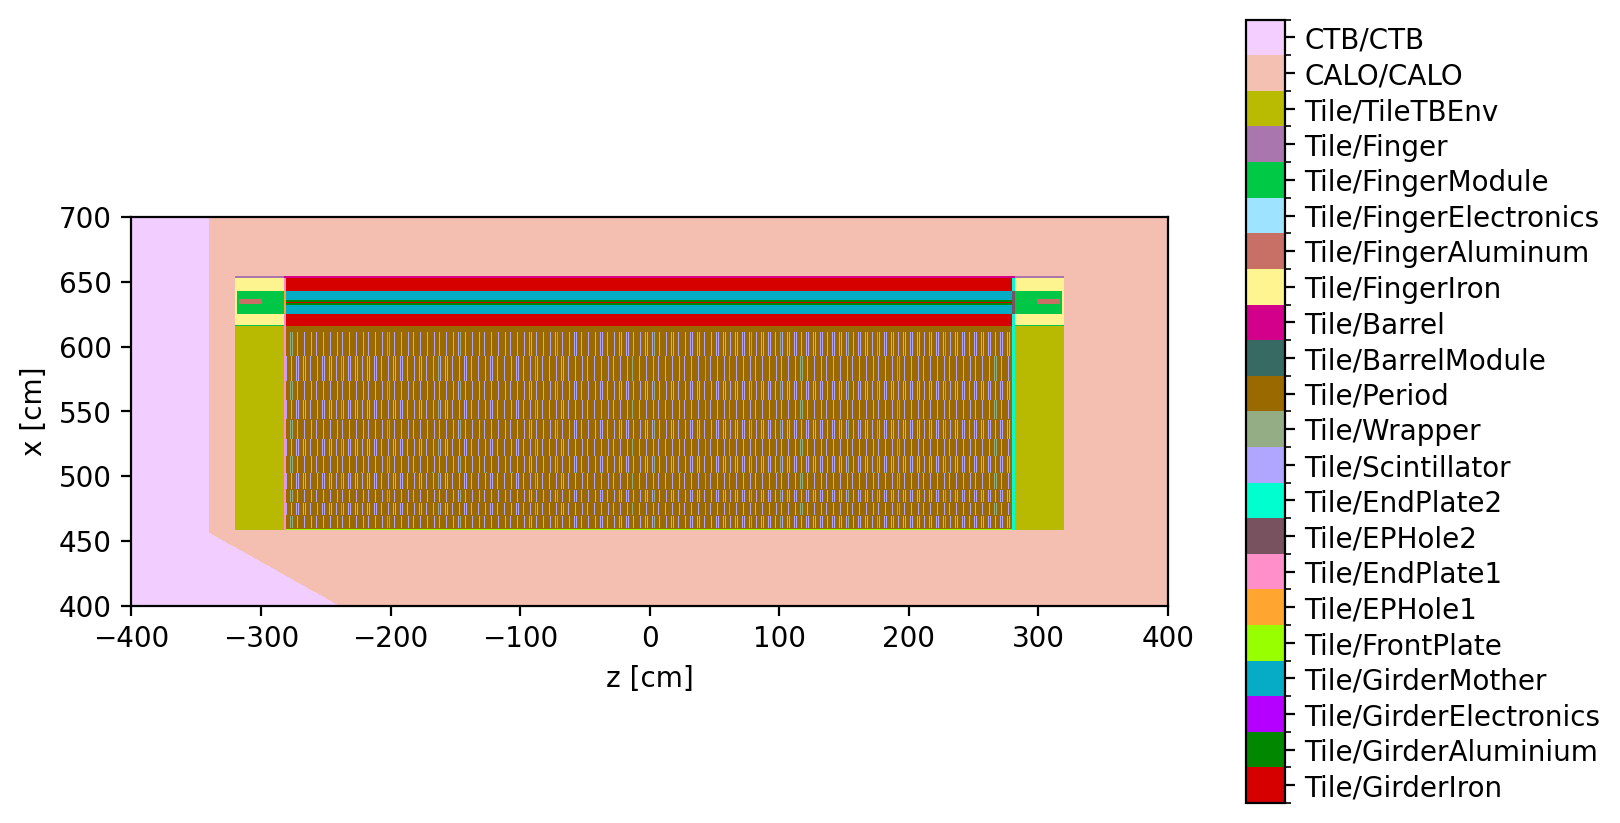

In [10]:
inp = {
    'geometry': 'vecgeom',
     'image': {'_units': 'cgs',
      'lower_left': [400, 0.01, -400],
      'upper_right': [700, 0.01, 400],
      'rightward': [0.0, 0.0, 1.0],
      'vertical_pixels': 2048},
     'memspace': 'host',
     'volumes': True,
}
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained", figsize=(8, 4))
im = visualize.load_and_plot_image(ax, img_md, img)

status: Tracing orange image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmpq8e9u76k.bin'


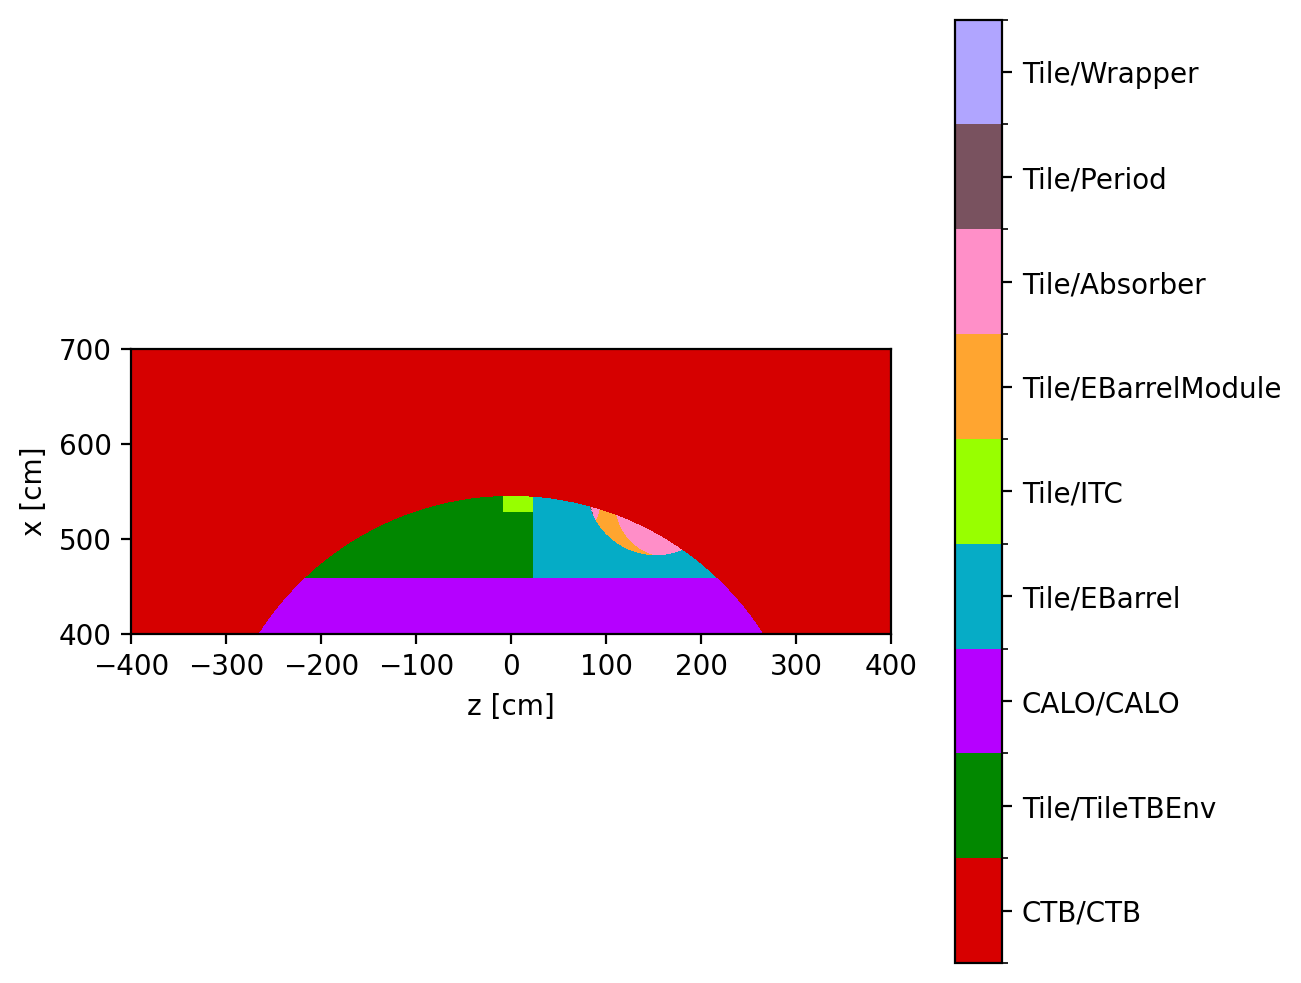

In [12]:
inp['geometry'] = 'orange'
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

status: Tracing vecgeom image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmphama0tc6.bin'


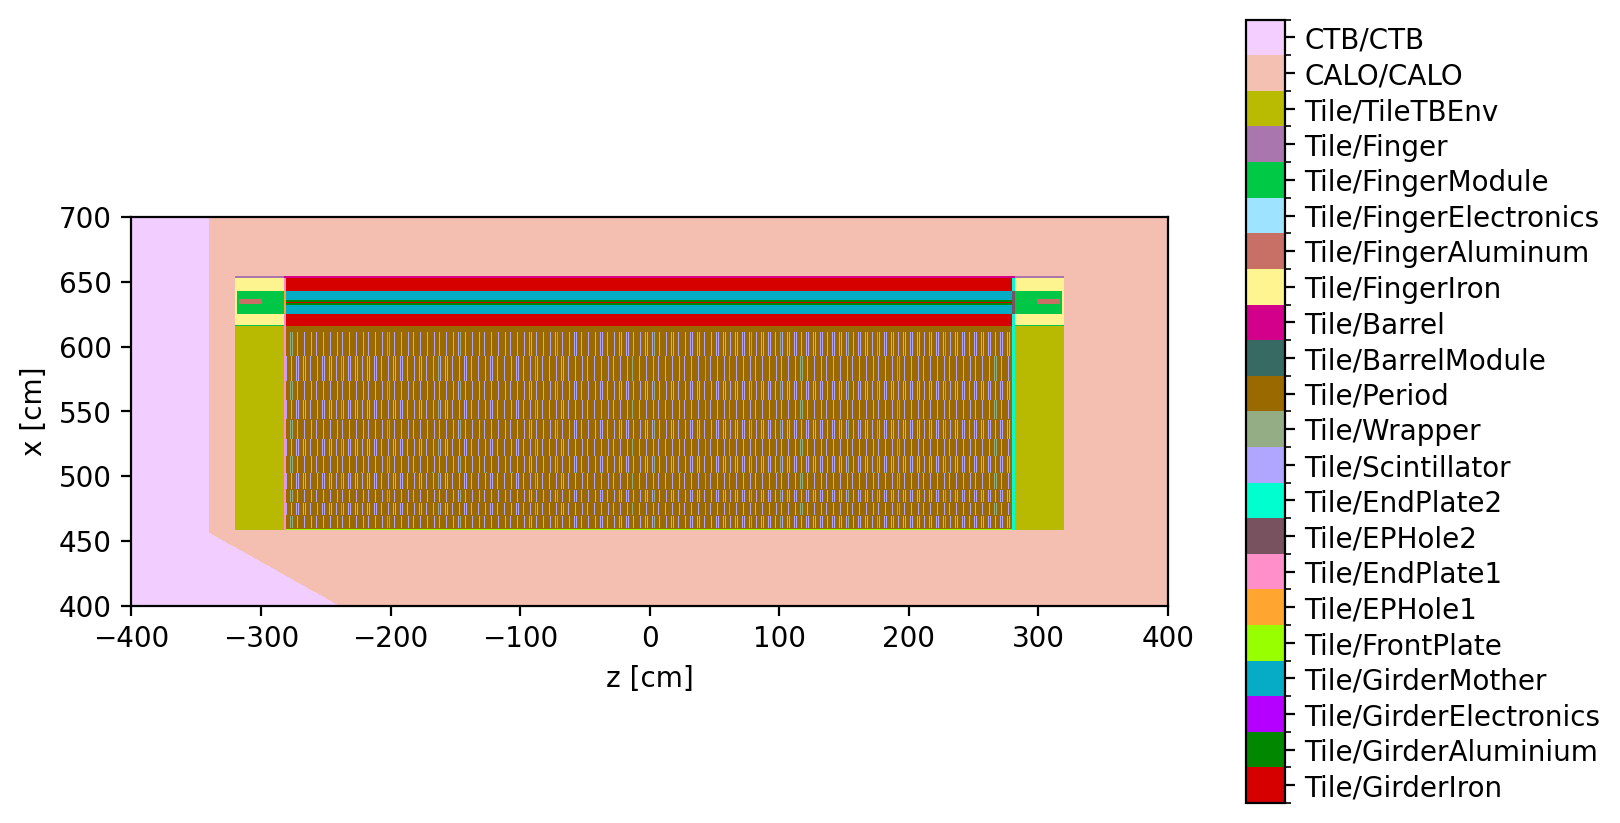

In [14]:
inp['geometry'] = 'vecgeom'
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained", figsize=(8, 4))
im = visualize.load_and_plot_image(ax, img_md, img)

status: Tracing vecgeom image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmps3eqhc09.bin'


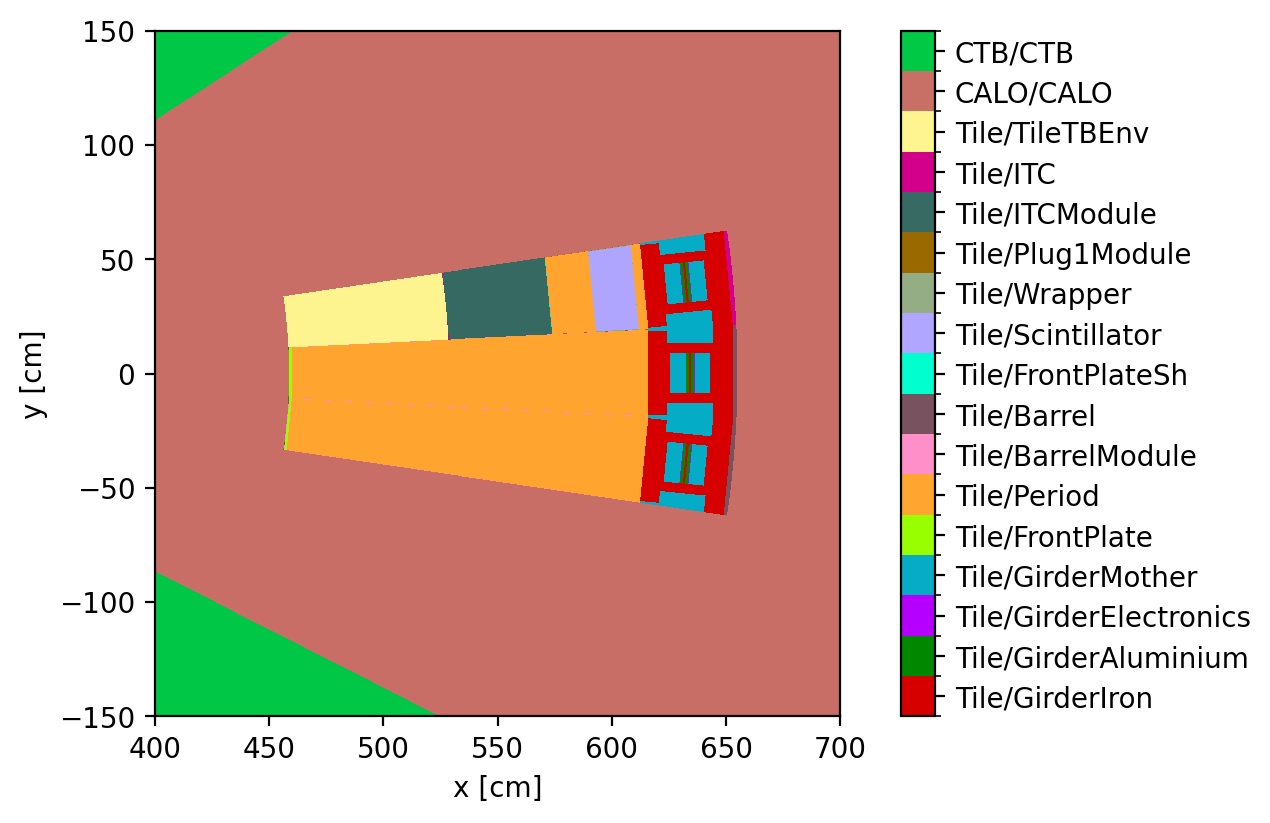

In [16]:
inp = {
    'geometry': 'vecgeom',
     'image': {'_units': 'cgs',
      'lower_left': [400, -150, 1.00],
      'upper_right': [700, 150, 1.0],
      'rightward': [1.0, 0.0, 0.0],
      'vertical_pixels': 2048},
     'memspace': 'host',
     'volumes': True,
}
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained", figsize=(6, 4))
im = visualize.load_and_plot_image(ax, img_md, img)

status: Tracing geant4 image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmph_xs9f63.bin'


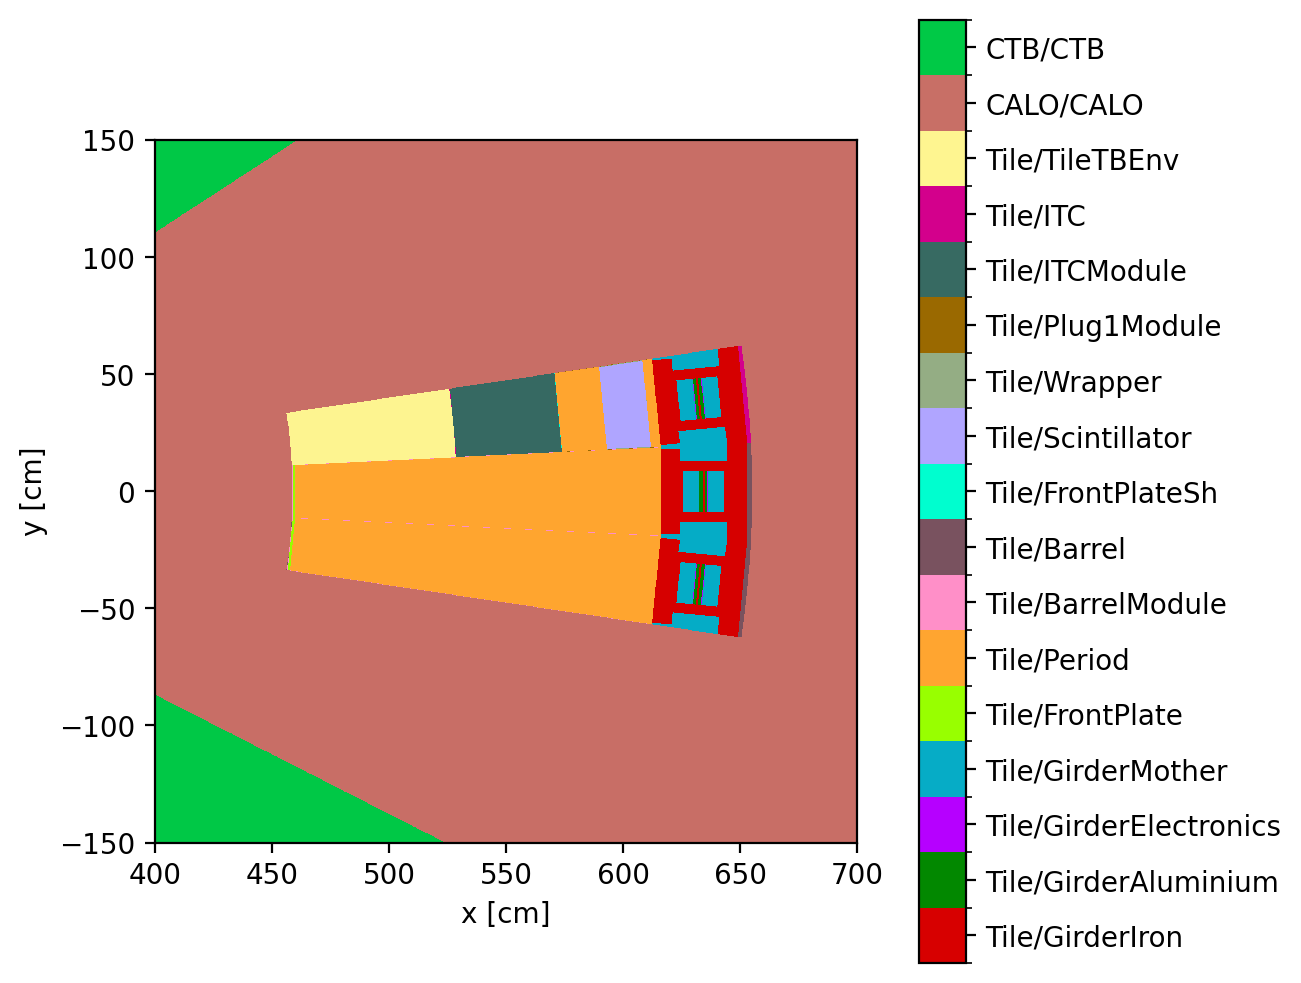

In [17]:
inp['geometry'] = 'geant4'
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

In [19]:
# Exit the program
communicate(None)

{'runtime': {'device': None,
  'kernels': [],
  'version': '0.5.0-dev.113+03ef82d0a'},
 'timers': {'load_geant4': 0.072738292,
  'load_orange': 0.069001167,
  'load_vecgeom': 0.0088095,
  'raytrace_geant4_host': 0.045789584,
  'raytrace_orange_host': 0.110583083,
  'raytrace_vecgeom_host': 1.7483241649999999}}